In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

In [ ]:
!git clone https://github.com/Salmaabidah/METLIT.git
data = pd.read_excel('/content/METLIT/Hasil_Survey_Mahasiswa_FST_UIN_JAKARTA.xlsx')

fatal: destination path 'METLIT' already exists and is not an empty directory.


In [ ]:
data

,Timestamp,Jurusan,Jaringan internet di rumah memiliki kualitas yang baik,Kekuatan jaringan mempengaruhi proses belajar mengajar,Anda puas dengan kualitas internet di rumah anda,Fokus belajar anda terganggu jika kualitas internet anda buruk,Anda sulit memahami pelajaran karena kualitas internet yang buruk,Anda lebih cepat memahami pelajaran jika kualitas internet baik/bagus,PJJ (Perkuliahan Jarak Jauh) membuat nilai Anda menurun,"Menurut anda, apa saja yang menjadi faktor IP menurun?",Jaringan apa yang digunakan dirumah anda?,Alasan memilih Wifi/Jaringan Seluler,"Menurut Anda, seberapa besar pengaruh kualitas internet terhadap kegiatan belajar Anda"
0,2022-04-09 17:48:52.141,Matematika,Setuju,Sangat Setuju,Kurang Setuju,Sangat Setuju,Kurang Setuju,Setuju,Tidak,"Waktu Belajar, Lingkungan",Wifi,Karena biaya lebih murah,75% - 100%
1,2022-04-09 17:53:37.241,Sistem Informasi,Sangat Setuju,Sangat Setuju,Setuju,Setuju,Setuju,Sangat Setuju,Tidak,Jaringan,Wifi,Lebih mudah diakses,75% - 100%
2,2022-04-09 17:53:38.000,Agribisnis,Setuju,Setuju,Setuju,Sangat Setuju,kurang Setuju,setuju,Tidak,"Jaringan, Waktu Belajar, Lingkungan",Jaringan Seluler,karena bisa mendapat subsidi kuota dari kampus...,75% - 100%
3,2022-04-09 17:53:39.000,Matematika,Setuju,Setuju,Setuju,Sangat Setuju,Setuju,Setuju,Tidak,"Jaringan, Waktu Belajar, Lingkungan",Wifi,lebih murah dan efisien,75% - 100%
4,2022-04-09 17:53:40.000,Kimia,Kurang Setuju,Sangat Setuju,Kurang Setuju,Sangat Setuju,Setuju,Sangat Setuju,Tidak,"Jaringan, Perangkat, Waktu Belajar, Lingkungan",Wifi,Karena bisa unlimited,75% - 100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2022-04-16 13:58:48.000,Teknik Informatika,Setuju,Setuju,Setuju,Setuju,Kurang Setuju,Setuju,Tidak,"Waktu Belajar, Lingkungan",Wifi,Wifi murah,50% - 75%
100,2022-04-16 14:40:22.000,Teknik Informatika,Kurang Setuju,Sangat Setuju,Kurang Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Tidak,"Jaringan, Perangkat, Waktu Belajar, Lingkungan",Wifi,"Wifi, lebih murah",75% - 100%
101,2022-04-26 22:07:18.672,Matematika,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Setuju,Setuju,Tidak,"Jaringan, Waktu Belajar, Lingkungan",Jaringan Seluler,lebih murah,75% - 100%
102,2022-04-26 22:09:52.597,Fisika,Setuju,Kurang Setuju,Kurang Setuju,Setuju,Kurang Setuju,Sangat Setuju,Tidak,Lingkungan,Jaringan Seluler,Karna tdk punya wifi,50% - 75%


# Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                                                                                  Non-Null Count  Dtype         
---  ------                                                                                  --------------  -----         
 0   Timestamp                                                                               104 non-null    datetime64[ns]
 1   Jurusan                                                                                 104 non-null    object        
 2   Jaringan internet di rumah memiliki kualitas yang baik                                  104 non-null    object        
 3   Kekuatan jaringan mempengaruhi proses belajar mengajar                                  104 non-null    object        
 4   Anda puas dengan kualitas internet di rumah anda                                        104 non-null    object        
 5   Fokus belajar anda ter

In [ ]:
#mengecek duplikasi data
print(data.shape)
data.duplicated().sum()

(104, 13)


0

In [ ]:
#mengecek missing value
print(data.isnull().sum())

Timestamp                                                                                 0
Jurusan                                                                                   0
Jaringan internet di rumah memiliki kualitas yang baik                                    0
Kekuatan jaringan mempengaruhi proses belajar mengajar                                    0
Anda puas dengan kualitas internet di rumah anda                                          0
Fokus belajar anda terganggu jika kualitas internet anda buruk                            0
Anda sulit memahami pelajaran karena kualitas internet yang buruk                         0
Anda lebih cepat memahami pelajaran jika kualitas internet baik/bagus                     0
PJJ (Perkuliahan Jarak Jauh) membuat nilai Anda menurun                                   0
Menurut anda, apa saja yang menjadi faktor IP menurun?                                    0
Jaringan apa yang digunakan dirumah anda?                                       

# EDA

### **seberapa banyak mahasiswa yang menganggap bahwa kulitas internet yang buruk berdampak buruk juga terhadap fokus belajar?**

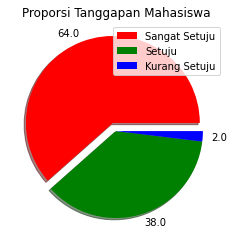

In [ ]:
gambar1 = data['Fokus belajar anda terganggu jika kualitas internet anda buruk']

proporsion = Counter(gambar1)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.1, 0, 0)
plt.pie(values, colors=colors, explode=explode, labels= values, shadow=True)
plt.title('Proporsi Tanggapan Mahasiswa')
plt.legend(labels,loc='best')
plt.show()

lebih dari 50% mahasiswa sangat setuju bahwa kualitas internet ini mempengaruhi fokus belajar

**Jaringan internet Mahasiswa di rumah memiliki kualitas yang baik**

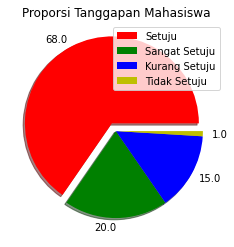

In [ ]:
gambar2 = data['Jaringan internet di rumah memiliki kualitas yang baik']

proporsion = Counter(gambar2)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.1, 0, 0, 0)
plt.pie(values, colors=colors, explode=explode, labels= values, shadow=True)
plt.title('Proporsi Tanggapan Mahasiswa')
plt.legend(labels,loc='best')
plt.show()

**presentase yang diberikan mahasiswa FST terkait besarnya pengaruh kualitas internet terhadap kegiatan belajar Anda**

In [ ]:
data = data.rename(columns={'Menurut Anda, seberapa besar pengaruh kualitas internet terhadap kegiatan belajar Anda':'presentase pengaruh kualitas internet terhadap kegiatan belajar'})

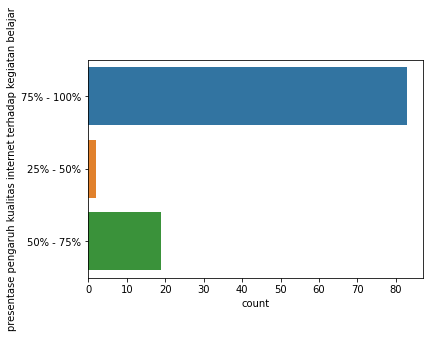

In [ ]:
p = sns.countplot(y="presentase pengaruh kualitas internet terhadap kegiatan belajar", data=data)

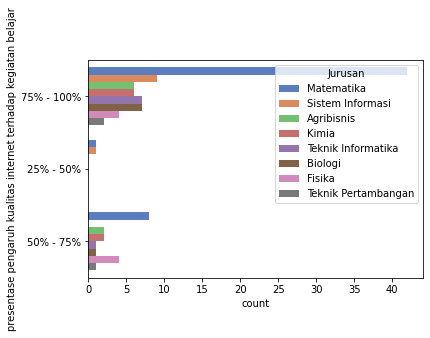

In [ ]:
ax = sns.countplot(y = 'presentase pengaruh kualitas internet terhadap kegiatan belajar', hue = 'Jurusan', palette = 'muted', data=data)

# **persiapan untuk pemodelan**

In [ ]:
selected_columns = ['PJJ (Perkuliahan Jarak Jauh) membuat nilai Anda menurun', 
                    'Jaringan internet di rumah memiliki kualitas yang baik', 
                    'Jaringan apa yang digunakan dirumah anda?']
data1 = []
df =  pd.read_excel('/content/METLIT/Hasil_Survey_Mahasiswa_FST_UIN_JAKARTA.xlsx')

In [ ]:
df = df[selected_columns]
data1.append(df)
data1 = pd.concat(data1, ignore_index= True)

In [ ]:
data1 = data1.rename(columns={'PJJ (Perkuliahan Jarak Jauh) membuat nilai Anda menurun':'penurunan_IP_selama_PJJ',
                              'Jaringan internet di rumah memiliki kualitas yang baik':'kualitas_jaringan',   
                              'Jaringan apa yang digunakan dirumah anda?':'jenis_jaringan'})

In [ ]:
data1

,penurunan_IP_selama_PJJ,kualitas_jaringan,jenis_jaringan
0,Tidak,Setuju,Wifi
1,Tidak,Sangat Setuju,Wifi
2,Tidak,Setuju,Jaringan Seluler
3,Tidak,Setuju,Wifi
4,Tidak,Kurang Setuju,Wifi
...,...,...,...
99,Tidak,Setuju,Wifi
100,Tidak,Kurang Setuju,Wifi
101,Tidak,Sangat Setuju,Jaringan Seluler
102,Tidak,Setuju,Jaringan Seluler


In [ ]:
#memberi index kualitas jaringan
kualitas = data1.kualitas_jaringan.unique().tolist()
data1['index_kualitas_jaringan'] = data1.kualitas_jaringan.map(lambda x: kualitas.index(x))

In [ ]:
#memberi index jenis jaringan
jenis = data1.jenis_jaringan.unique().tolist()
data1['index_jenis_jaringan'] = data1.jenis_jaringan.map(lambda x: jenis.index(x))

In [ ]:
data1.sample(10)

,penurunan_IP_selama_PJJ,kualitas_jaringan,jenis_jaringan,index_kualitas_jaringan,index_jenis_jaringan
98,Tidak,Sangat Setuju,Wifi,1,0
34,Ya,Sangat Setuju,Wifi,1,0
102,Tidak,Setuju,Jaringan Seluler,0,1
69,Ya,Kurang Setuju,Jaringan Seluler,2,1
1,Tidak,Sangat Setuju,Wifi,1,0
97,Tidak,Setuju,Wifi,0,0
54,Tidak,Sangat Setuju,Dua duanya,1,3
42,Ya,Kurang Setuju,Jaringan Seluler,2,1
18,Ragu-ragu,Setuju,Wifi,0,0
26,Tidak,Setuju,Jaringan Seluler,0,1


### **Regresi Logistik**

In [ ]:
x=data1.iloc[:, 3:]
y=data1.iloc[:,0]
print("Berikut ini tampilan data X")
print(x.head())
print("")
print("Berikut ini tampilan data Y")
print(y.head())

Berikut ini tampilan data X
   index_kualitas_jaringan  index_jenis_jaringan
0                        0                     0
1                        1                     0
2                        0                     1
3                        0                     0
4                        2                     0

Berikut ini tampilan data Y
0    Tidak
1    Tidak
2    Tidak
3    Tidak
4    Tidak
Name: penurunan_IP_selama_PJJ, dtype: object


In [ ]:
model=LogisticRegression(multi_class='auto')
features = ['index_kualitas_jaringan', 'index_jenis_jaringan']
x_train, x_test, y_train, y_test = train_test_split(data1[features].values, data1['penurunan_IP_selama_PJJ'].values, 
                                                    test_size=0.8, random_state=103)
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[[ 0.67078135  0.22154797]
 [-0.84977042 -0.39102718]
 [ 0.17898907  0.16947921]]
[-2.06163763  2.13496165 -0.07332402]


In [ ]:
predictions=model.predict(x_test)
print(classification_report(y_test,predictions))
print("Precision Score : ",precision_score(y_test, predictions, pos_label='positive', average='micro'))
print('Recall = ', recall_score(y_test, predictions, pos_label='positive', average='micro'))

              precision    recall  f1-score   support

   Ragu-ragu       0.00      0.00      0.00         3
       Tidak       0.74      0.95      0.83        59
          Ya       0.62      0.23      0.33        22

    accuracy                           0.73        84
   macro avg       0.45      0.39      0.39        84
weighted avg       0.68      0.73      0.67        84

Precision Score :  0.7261904761904762
Recall =  0.7261904761904762


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
model.score(x_train, y_train)

0.85

**cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
import time

mulai = time.time()
scores_regLog = cross_val_score(model, x, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.68 (+/- 0.18), Waktu = 0.094 detik


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
